<a href="https://colab.research.google.com/github/igorleonel/DataScience/blob/main/Classifica%C3%A7%C3%A3o_de_Roupas_usando_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

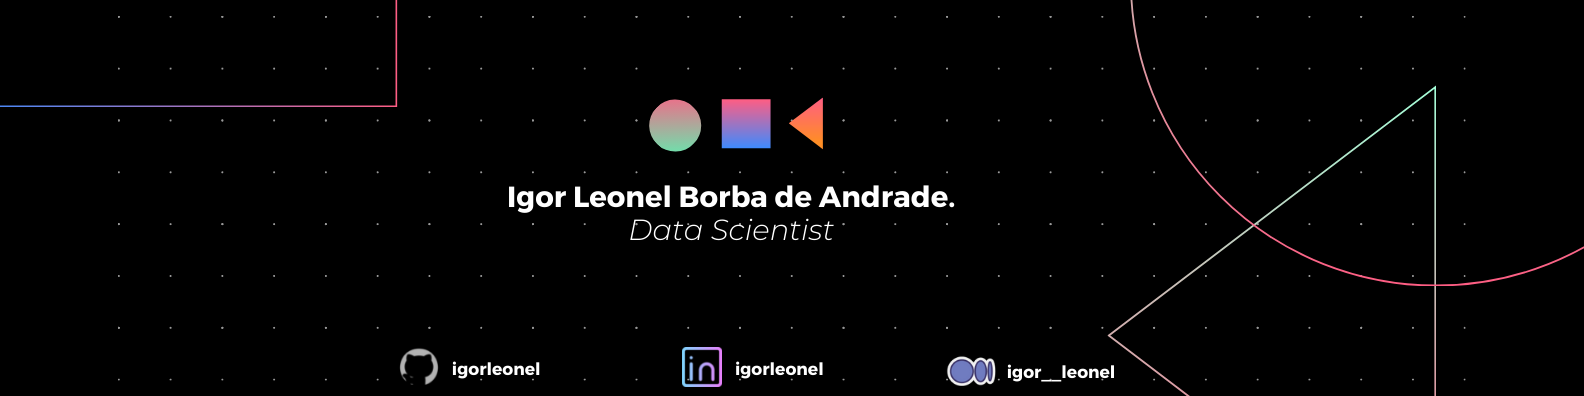

# Classificação de Roupas usando Deep Learning

***Fashion MNIST*** é um *dataset* padrão usado em **Deep Learning** e **Computer Vision**, contendo 70 mil imagens de 10 classes diferentes.

Apesar de trazer imagens já pré-processadas, representa um bom desafio para aplicar redes neurais profundas. Especificamente, serve para demonstrar um tipo especial das redes neurais, as redes neurais convolucionais (*Convolutional Neural Networks* - **CNN**).

O *dataset* é dividido entre treino (60 mil amostras) e teste (10 mil amostras), sendo que cada imagem possui dimensões de 28 x 28 *pixels*.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Cada imagem pertence exclusivamente a uma única classe. A tabela abaixo segue a documentação do Fashion MNIST, onde são documentados os 10 *labels* possíveis:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Este *dataset* foi criado em substituição ao MNIST tradicional, onde as imagens eram puramente de dígitos manuscritos. Dentre os motivos principais, o MNIST origianl era:

* Muito fácil, uma vez que as CNN conseguiam atingir tranquilamente a acurácia de 99,7%.
* Não representava mais os desafios modernos da área da Visão Computacional.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/embedding.gif" height="300px"></p>

## Obtenção dos dados

Existem duas maneiras de se obter os dados do Fashion MNIST:

* [Diretamente a partir do repositório no Github](https://github.com/zalandoresearch/fashion-mnist)
* Carregando a partir do TensorFlow.

Para este projeto, irei carregar os dados a partir do próprio TensorFlow.

In [ ]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

Seguindo a padronização da documentação, criarei uma lista contendo os *labels* traduzidos para o portugês.

In [ ]:
# De acordo com a documentação, os labels são:
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

## Exploração dos Dados

Apesar desse conjunto de dados vir previamente processado e bem documentado, exploraremos rapidamente a fim de tirar alguns *insights*. Primeiramente, irei verificar as dimensões dos *arrays* retornados pela função `fashion_mnist.load_data()`.

Conforme visto anteriormente, há 60.000 amostras de treino e 10.000 de teste, sendo as imagens 28 x 28 *pixels* em tons de cinza (1 canal).

Também é possível ver como uma imagem "se parece" quando é convertida para um *array*. Vale lembrar que os valores de cada *pixel* estão compreendidos entre $[0, 255]$.

In [ ]:
# ver a dimensionalidade dos DataFrames
print("Dimensionalidade dos DataFrames:")
print("X_train_orig:", X_train_orig.shape)
print("y_train_orig:", y_train_orig.shape)
print("X_test_orig:", X_test_orig.shape)
print("y_test_orig:", y_test_orig.shape)

# ver uma fatia de uma imagem
print("\n\nImagem convertida em array:\n", X_train_orig[0][:5][:5])

Dimensionalidade dos DataFrames:
X_train_orig: (60000, 28, 28)
y_train_orig: (60000,)
X_test_orig: (10000, 28, 28)
y_test_orig: (10000,)


Imagem convertida em array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


Irei verificar se os datasets de treino/teste estão balanceados adequadamente. Ou seja, se contém uma proporção ideal entre as diferentes classes.



In [ ]:
# verificar os valores únicos por classes (treino)
print("y_train_orig:")
np.unique(y_train_orig, return_counts=True)

y_train_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
# verificar os valores únicos por classes (teste)
print("y_test_orig:")
np.unique(y_test_orig, return_counts=True)

y_test_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

Há pouco a se explorar nesta análise exploratória preliminar, tratando-se mais de uma etapa visando aumentar a consciência situacional a respeito do *dataset*.

Por fim, vamos visualizar algumas imagens com seus *labels*.

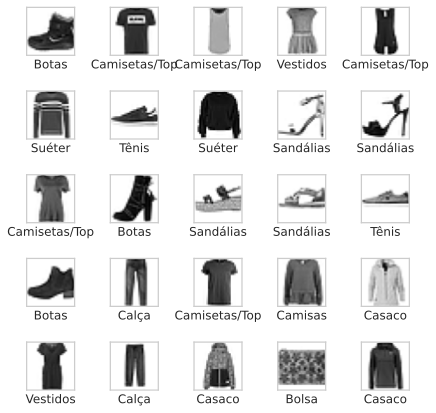

In [ ]:
# ver algumas imagens de exemplo
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_orig[i]])
plt.tight_layout()

## Pré-Processamento dos Dados

Antes de criar o modelo e treinar a rede neural, irei passar por algumas etapas de pré-processamento.

### Normalizar os *pixels*

As intensidades dos *pixels* devem ser normalizadas, Ou seja, os valores inteiros devem ser convertidos no tipo `float` e ficar dentro do intervalo $[0, 1]$.

Aqui, como o valor máximo do *pixel* é 255, basta fazer a divisão de todos *pixels* individuais por 255.0 e eles estarão normalizados e do tipo `float`.

In [ ]:
# criar função lambda que transforma em float32 e normaliza os pixels
f = lambda x: (x / 255.0).astype("float32")

# aplicar a função lambda aos datasets X_train e X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Redimensionar as Imagens

O primeiro *layer* convolucional espera um único tensor que contenha todos os *pixels*. O TensorFlow espera uma única lista com 4 dimensões, e não 60000 itens de dimensões 28 x 28 x 1, como é o caso do *dataset* de treino (o mesmo vale para os dados de teste).

In [ ]:
# redimensionar as imagens
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("X_train:{}".format(X_train.shape))
print("X_test:\t{}".format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:	(10000, 28, 28, 1)


### One-Hot Encoding

Os *labels* já estão codificados entre 0 e 9, naquilo que chamamos de *Integer Encoding*. É possível utilizar diretamente `y_train` e `y_test`, desde que se use `loss="sparse_categorical_crossentropy"`.

No entanto, utilizá-los diretamente pode levar o modelo de *Deep Learning* a entenderque há uma relação natural de ordem entre os *labels*, o que não é verdade - podendo levar a um desempenho inferior.

Para variáveis categóricas onde não há nenhuma relação ordinal, prefiro usar o método One-Hot Encoding. Para saber mais sobre as diferenças entre essas duas técnicas, [leia este artigo](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Veja um exemplo prático como funciona esse tipo de codificação.



In [ ]:
exemplo = np.array([1, 3, 4, 2, 0])
print("Exemplo antes do Encoding:")
print(exemplo)

exemplo_encoded = keras.utils.to_categorical(exemplo)
print("\nExemplo depois do Encoding")
print(exemplo_encoded)

Exemplo antes do Encoding:
[1 3 4 2 0]

Exemplo depois do Encoding
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


Da mesma maneira que o exemplo acima, vamos aplicar o *one-hot encoding* aos *labels*.

In [ ]:
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)

## Definindo uma Rede Neural Convolucional

Existem diversas arquiteturas consagradas de CNN. Para este projeto, será utilizada uma arquitetura simplificada da VGGNet, implementada em um artigo do Cientista de Dados Adrian Rosebroke.

A implementação original foi adaptada por mim, a fim de adequar as dimensões 28 x 28 das nossas imagens e permitir o uso da API Keras.

In [ ]:
# baseado na implementação da MiniVGGNet do Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

Como mencionado anteriormente, uma vez que os *labels* estão *one-hot encoded*, será utilizado `loss="categorical_crossentropy"` para compilar o modelo.

Também será informado explicitamente o uso de dados de validação na proporção de 1/3.

In [ ]:
# model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# treinar o modelo e salvar as informações em history
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 11s 7ms/step - loss: 0.5360 - accuracy: 0.8156 - val_loss: 0.3162 - val_accuracy: 0.8874
Epoch 2/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3385 - accuracy: 0.8790 - val_loss: 0.2544 - val_accuracy: 0.9118
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2991 - accuracy: 0.8933 - val_loss: 0.2645 - val_accuracy: 0.9086
Epoch 4/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2802 - accuracy: 0.8988 - val_loss: 0.2372 - val_accuracy: 0.9176
Epoch 5/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2536 - accuracy: 0.9069 - val_loss: 0.2219 - val_accuracy: 0.9198
Epoch 6/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2312 - accuracy: 0.9152 - val_loss: 0.2069 - val_accuracy: 0.9254
Epoch 7/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2139 - accuracy: 0.9214 - val_loss: 0.2300 - val_accura

## Avaliando o Modelo

No geral, o nosso modelo atingiu uma acurácia de XX nos dados de treino e XX nos dados de validação.

No entanto, se observarmos melhor veremos que ela não teve o desempenho bom para a categoria "Camisas". Provavalmente isso pode ser melhorado com técnicas de *data augmentation*.

In [ ]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

               precision    recall  f1-score   support

Camisetas/Top       0.90      0.86      0.88      1000
        Calça       1.00      0.98      0.99      1000
       Suéter       0.92      0.90      0.91      1000
     Vestidos       0.92      0.94      0.93      1000
       Casaco       0.89      0.90      0.89      1000
    Sandálias       0.98      0.99      0.99      1000
      Camisas       0.77      0.81      0.79      1000
        Tênis       0.97      0.96      0.97      1000
        Bolsa       0.99      0.98      0.99      1000
        Botas       0.97      0.97      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



Olhando as curvas *accuracy* e *val_accuracy*, identifica-se talvez um pequeno *overfitting*, mas que não prejudicou muito o desempenho da CNN perante aos dados de validação.

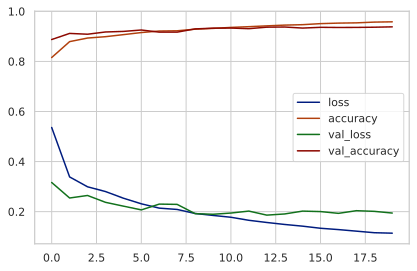

In [ ]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

Por fim, vemos que a acurácia no *dataset* de teste se mantém muito boa, o que significa que o modelo é genérico o suficiente para lidar com dados novos.